#  Notebook
## Example merging DMCs and DMRs

This notebook provides an example on merging files from Methylkit (DMC's) and DMRs from Methylsig.


In [1]:
import pandas as pd
from sciutil import SciUtil
from scidmg import SciDMG
import os
data_dir = f'{os.path.dirname(os.path.realpath("."))}/../../tests/data/'
dmr_file = f'{data_dir}methylSig_prom.csv'
dmc_file = f'{data_dir}methylKit_DMC.csv'
percent_meth_file = f'{data_dir}methylKit_percentMeth.csv'

u = SciUtil()


## Inspect files

Just to give you an idea of what the files as input are we print out the head of each input file.

Note that each file has the same column name for the gene symbol **external_gene_name**. This will be used to merge the files.


In [2]:
u.dp(['DMR file header:'])
print(pd.read_csv(dmr_file))

u.dp(['DMC file header:'])
print(pd.read_csv(dmc_file))

u.dp(['Percentage methylation file header:'])
print(pd.read_csv(percent_meth_file))


--------------------------------------------------------------------------------
                               DMR file header:	                                
--------------------------------------------------------------------------------
   idx seqnames  start  end  gene_idx  meth_diff     uid  pvalue    fdr  \
0    1     chr1     10  100         1       -0.6   dmr_1   0.001  0.010   
1    2     chr1    123  190         2       -0.1   dmr_2   0.010  0.300   
2    3     chr1      3  200         3        0.8   dmr_3   0.010  0.010   
3    4     chr1    123  312         4       -0.1   dmr_4   0.010  0.010   
4    5     chr1    123  190         2       -0.1   dmr_5   0.010  0.001   
5    6     chr1    123  190         2        0.3   dmr_6   0.010  0.010   
6    7     chr1    123  190         2       -0.2   dmr_7   0.010  0.010   
7    3     chr1      3  200         3       -0.9  dmr_10   0.010  0.010   

   ensembl_gene_id external_gene_name chromosome_name  start_position  \
0  ENSG0

## Override the default parameters

Here we just show how some of the parameters can be overridden.

For example, we have made this a bit stricter than the defaults and required a cutoff for DMC's of 0.05.

We also make the DMRs have at least 70% of DMCs in agreement of direction.


In [3]:
dmg = SciDMG(dmr_file, percent_meth_file, dmc_file,
           dmc_methdiff="meth.diff", dmc_padj="qvalue", dmc_uid="uid", dmc_padj_cutoff=0.05,
           dmr_methdiff="meth_diff", dmr_padj="fdr", dmr_uid="uid", dmr_padj_cutoff=0.1,
            min_perc_agreement=0.7, min_meth_diff=0.1, plot=True
        )
dmg.run()
dmg.print_stats()

--------------------------------------------------------------------------------
              Please run dmg.run() before plotting the volcanos.	               
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
              Please run dmg.run() before plotting the volcanos.	               
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
                  Length of all merged methylation data: 	16	                   
--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
            Length of merged

## Plot volcanos

We may want to inspect our files as well, so we can plkot a volcano of the DMcs and the DMRs.

--------------------------------------------------------------------------------
No offset was provided, setting offset to be smallest value recorded in dataset: 	0.01	
--------------------------------------------------------------------------------


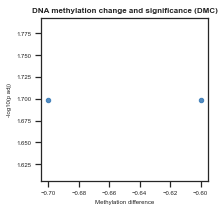

--------------------------------------------------------------------------------
No offset was provided, setting offset to be smallest value recorded in dataset: 	0.01	
--------------------------------------------------------------------------------


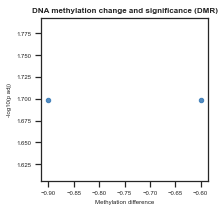

In [4]:
dmg.plot_dmc_volcano()
dmg.plot_dmr_volcano()
